# Clustering_n_Anomalies

In [1]:
import numpy as np # For numeric operation
import pandas as pd # For Tabular information
import matplotlib.pyplot as plt # For draw plots
%matplotlib inline
import sklearn as sk # For Machine Learnig Algorithms
import kaggle # For download dataset with api
import missingno as msno # Tools for missing values

print(f'numpy v.{np.__version__}\npandas v.{pd.__version__}\nsklearn v.{sk.__version__}\nmissingno v.{msno.__version__}')


numpy v.1.18.1
pandas v.1.0.5
sklearn v.0.22.1
missingno v.0.4.2


## EDA

In [2]:
# Download Dataset
#https://www.kaggle.com/iabhishekofficial/mobile-price-classification/train.csv
kaggle.api.dataset_download_cli('shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection', path='www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection', unzip=True)


credit_card_data = pd.read_csv(r".\www.kaggle.com\shubhamjoshi2130of\abstract-data-set-for-credit-card-fraud-detection\creditcardcsvpresent.csv")
thread = kaggle.api.datasets_view('shubhamjoshi2130of','abstract-data-set-for-credit-card-fraud-detection',async_req=True)
result = thread.get()
result

100%|██████████| 58.6k/58.6k [00:00<00:00, 459kB/s]

{'id': 20470,
 'ref': 'shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection',
 'subtitle': 'Use this data set to develop Models to detect credit card fraud.',
 'tags': [{'ref': 'computing',
   'competitionCount': 0,
   'datasetCount': 6589,
   'description': 'Computing is any goal-oriented activity requiring, benefiting from, or creating a mathematical sequence of steps known as an algorithm.',
   'fullPath': 'technology and applied sciences > computing',
   'isAutomatic': False,
   'name': 'computing',
   'scriptCount': 6,
   'totalCount': 6595}],
 'creatorName': 'VinayakJoshi',
 'creatorUrl': None,
 'totalBytes': 161497,
 'url': 'https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection',
 'lastUpdated': '2018-04-09T05:53:13.11Z',
 'downloadCount': 1776,
 'isPrivate': False,
 'isReviewed': False,
 'isFeatured': False,
 'licenseName': 'Data files © Original Authors',
 'description': '',
 'ownerName': 'VinayakJoshi',
 'ownerRef': 'shubh

In [3]:
# Shape
print(f"""credit_card_data have {credit_card_data.shape[0]} rows by {credit_card_data.shape[1]} columns""")

credit_card_data have 3075 rows by 12 columns


In [4]:
pd.set_option('display.max_columns', 30) #Configurando para que se muestren maximo 30 columnas
credit_card_data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
#Show info about Dataframe
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

Transaction date haven't logs, we will remove

In [6]:
credit_card_data = credit_card_data.drop(['Transaction date'], axis=1)

In [7]:
# Removing duplicates
print(credit_card_data.shape)
credit_card_data = credit_card_data.drop_duplicates()
print(credit_card_data.shape)

(3075, 11)
(3075, 11)


Dataset haven't duplicates

### Description

#### Numerical Description

In [8]:
# Description Number
credit_card_data.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


#### Categorical Description

In [9]:
credit_card_data.describe(include='O')

,Is declined,isForeignTransaction,isHighRiskCountry,isFradulent
count,3075,3075,3075,3075
unique,2,2,2,2
top,N,N,N,N
freq,3018,2369,2870,2627


#### Analysis Target

In [10]:
credit_card_data.isFradulent.value_counts()

N    2627
Y     448
Name: isFradulent, dtype: int64

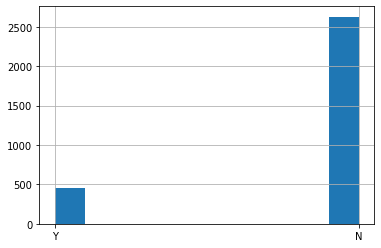

In [11]:
credit_card_data.isFradulent.hist()

#### Handling data

In [12]:
from sklearn import preprocessing

cat_columns= list(credit_card_data.select_dtypes('O').columns)
#cat_columns.remove('isFradulent')
#credit_card_data = pd.get_dummies(credit_card_data, columns=cat_columns)


le = preprocessing.LabelEncoder()
for i in cat_columns:
    
    credit_card_data[i] = le.fit_transform(credit_card_data[i])

credit_card_data.shape
#Posible use dummies

(3075, 11)

In [13]:
credit_card_data.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


### Correlation

In [14]:
# Correlation number columns
corr = credit_card_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Merchant_id,1.00,0.02,0.05,0.16,-0.02,0.03,0.03,0.09,0.09,0.12,0.04
Average Amount/transaction/day,0.02,1.00,0.59,0.08,-0.01,0.05,0.01,0.06,0.06,0.07,0.02
Transaction_amount,0.05,0.59,1.00,0.20,0.26,0.28,0.33,0.25,0.26,0.30,0.53
Is declined,0.16,0.08,0.20,1.00,0.12,0.08,0.13,0.39,0.41,0.50,0.27
Total Number of declines/day,-0.02,-0.01,0.26,0.12,1.00,0.23,0.29,0.09,0.08,0.09,0.53
isForeignTransaction,0.03,0.05,0.28,0.08,0.23,1.00,0.49,0.05,0.06,0.08,0.48
isHighRiskCountry,0.03,0.01,0.33,0.13,0.29,0.49,1.00,0.07,0.07,0.10,0.64
Daily_chargeback_avg_amt,0.09,0.06,0.25,0.39,0.09,0.05,0.07,1.00,0.95,0.88,0.39
6_month_avg_chbk_amt,0.09,0.06,0.26,0.41,0.08,0.06,0.07,0.95,1.00,0.85,0.38
6-month_chbk_freq,0.12,0.07,0.30,0.50,0.09,0.08,0.10,0.88,0.85,1.00,0.44


## Handling Data

In [15]:
credit_card_data.notnull().apply(pd.Series.value_counts)
# When False have a number is for this column have nulls, like LotFrontage have nulls

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
True,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075,3075


In [16]:
 credit_card_data.isnull().any().value_counts()

False    11
dtype: int64

We haven't features with nulls

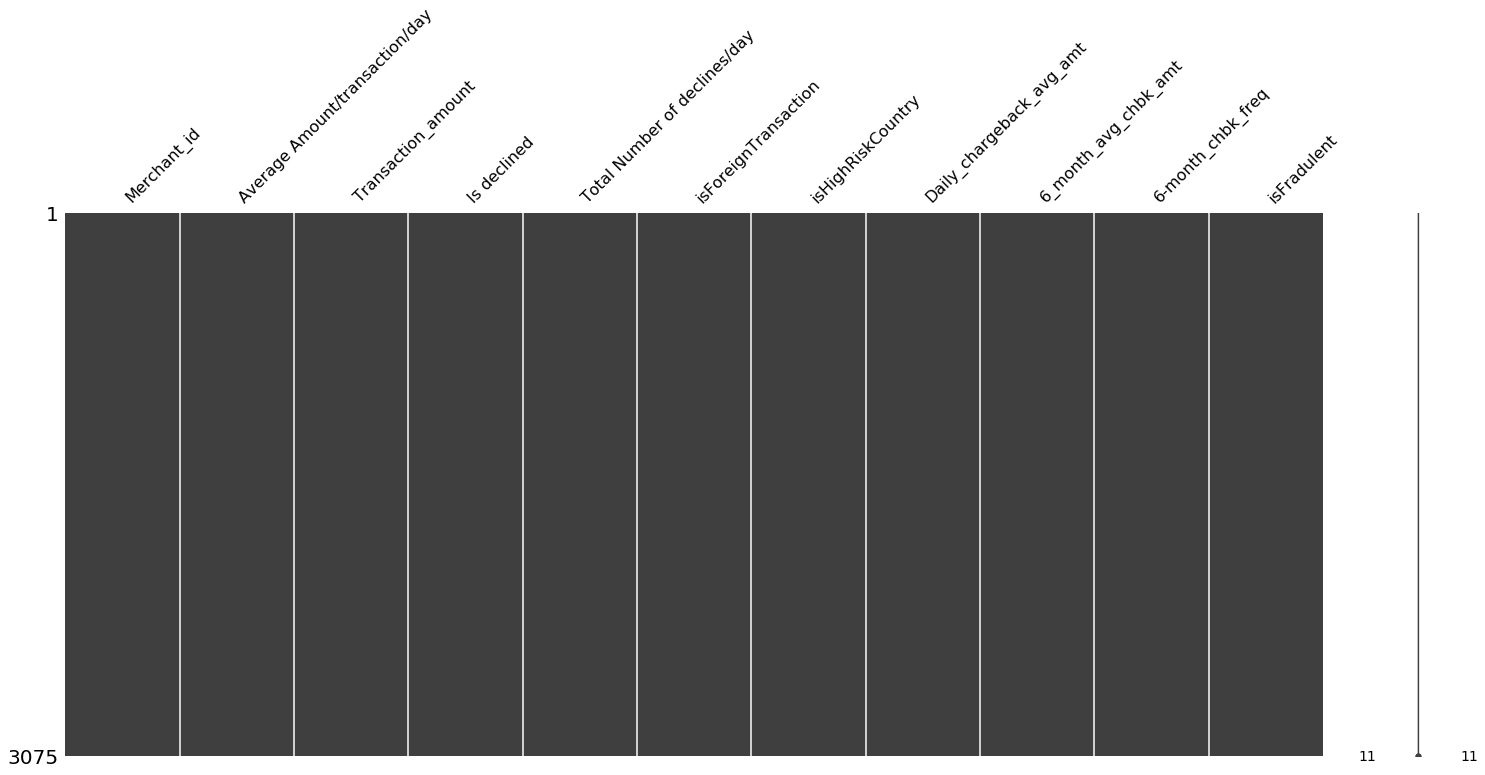

In [17]:
msno.matrix(credit_card_data);

#### Split the data

In [18]:
# Features and target
X = credit_card_data.drop(['isFradulent'], axis=1)
y = credit_card_data[['isFradulent']]

print(f"""X shape {X.shape}
y shape {y.shape}""")


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)


print(f"""X_train shape {X_train.shape}
y_train shape {y_train.shape}
X_test shape {X_test.shape}
y_test shape {y_test.shape}""")

X shape (3075, 10)
y shape (3075, 1)
X_train shape (2152, 10)
y_train shape (2152, 1)
X_test shape (923, 10)
y_test shape (923, 1)


__Best features for classifier models__

('Merchant_id', 0.03483031438858131)
('Average Amount/transaction/day', 0.02956912297733627)
('Transaction_amount', 0.1344237941155617)
('Is declined', 0.00473676673872081)
('Total Number of declines/day', 0.10773542737807329)
('isForeignTransaction', 0.09166762441056697)
('isHighRiskCountry', 0.15896983601344594)
('Daily_chargeback_avg_amt', 0.07935195934272521)
('6_month_avg_chbk_amt', 0.048713918567421466)
('6-month_chbk_freq', 0.0639683180778503)


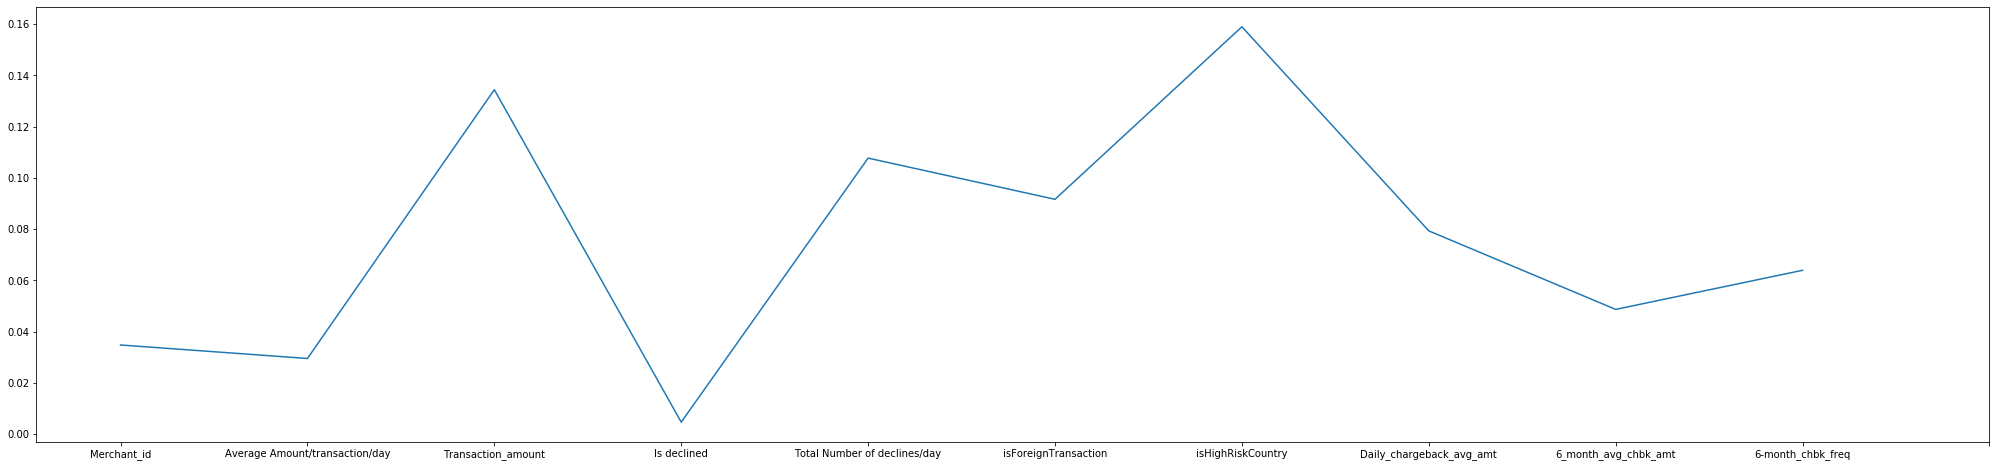

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
clf_selector = SelectKBest(mutual_info_regression, k=10)
clf_selector.fit(X_train,y_train['isFradulent'])
clf_scores = clf_selector.scores_


plt.rcParams["figure.figsize"] = [35,8]
plt.plot(clf_scores)
plt.xticks(np.arange(11),list(X.columns));
print(*dict(zip(X.columns,clf_scores)).items(), sep='\n')

IsHighRiskCountry is most important feature for the predictor

In [20]:
clf_best_cols = [X_train.columns[i] for i,j in enumerate(clf_scores) if j > 0.04]
clf_best_cols

['Transaction_amount',
 'Total Number of declines/day',
 'isForeignTransaction',
 'isHighRiskCountry',
 'Daily_chargeback_avg_amt',
 '6_month_avg_chbk_amt',
 '6-month_chbk_freq']

## Modeling

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
#plt.scatter(X_test['Merchant_id'], y_pred_test)
#plt.title('Plot predict data')

### Kmeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
KM_parameters = {'max_iter':range(100,1001,100), 'algorithm':["full", "elkan"], 'init':['random','k-means++'],'n_init':range(10,101,10)}

In [25]:
from sklearn.metrics import make_scorer, f1_score



f1sc = make_scorer(f1_score, average='micro')

KM1 = GridSearchCV(KMeans(n_clusters=2, random_state=1), KM_parameters, n_jobs=4, cv=5, scoring=f1sc, return_train_score=True, verbose=1) #5 kfolds
KM1.fit(X=X_train, y=y_train['isFradulent'])
KM_model1 = KM1.best_estimator_
print('Best KM1 ', KM1.best_score_, KM1.best_params_) 

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:  5.3min finished


Best KM1  0.5009172826849403 {'algorithm': 'full', 'init': 'k-means++', 'max_iter': 100, 'n_init': 10}


In [26]:
KM2 = GridSearchCV(KMeans(n_clusters=2, random_state=1), KM_parameters, n_jobs=4, cv=5, scoring=f1sc, return_train_score=True, verbose=1) #5 kfolds
KM2.fit(X=X_train[clf_best_cols], y=y_train['isFradulent'])
KM_model2 = KM2.best_estimator_
print('Best KM2 ', KM2.best_score_, KM2.best_params_) 

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   51.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:  6.7min finished


Best KM2  0.6982970916743108 {'algorithm': 'full', 'init': 'k-means++', 'max_iter': 100, 'n_init': 20}


### Insolation Forest

Taking into account that the Insolation Forest algorithm returns values ​​of 1 or -1, a decision is made to transform the values ​​of the column to be predicted to match the values ​​of the algorithm.

In [27]:
y_train_IF = y_train.copy()

In [28]:
y_train_IF[y_train['isFradulent'] == 1] = -1

In [29]:
y_train_IF[y_train['isFradulent'] == 0] = 1

In [30]:
from sklearn.ensemble import IsolationForest

In [31]:
IF_parameters = {'n_estimators':range(100,1001,100), 'max_samples':[100,500,2000,'auto']}

In [32]:
# Train with all features
from sklearn.metrics import make_scorer, f1_score
f1sc = make_scorer(f1_score, average='micro')

IF1 = GridSearchCV(IsolationForest(random_state=1), IF_parameters, n_jobs=4, cv=5, scoring=f1sc, return_train_score=True, verbose=1) #5 kfolds
IF1.fit(X=X_train, y=y_train_IF['isFradulent'])
IF_model1 = IF1.best_estimator_
print('Best IF1 ', IF1.best_score_, IF1.best_params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  3.9min finished


Best IF1  0.9539912588355905 {'max_samples': 500, 'n_estimators': 500}


In [33]:
# Train with best features


IF2 = GridSearchCV(IsolationForest(random_state=1), IF_parameters, n_jobs=4, cv=5, scoring=f1sc, return_train_score=True, verbose=1) #5 kfolds
IF2.fit(X=X_train[clf_best_cols], y=y_train_IF['isFradulent'])
IF_model2 = IF2.best_estimator_
print('Best IF2 ', IF2.best_score_, IF2.best_params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  3.9min finished


Best IF2  0.9530642637457507 {'max_samples': 2000, 'n_estimators': 700}


### Comparison

In [34]:
pred_clf_IF_all=IF_model1.predict(X_test) # 1. Predict Isolation Forest classifier with all features
pred_clf_IF_best=IF_model2.predict(X_test[clf_best_cols]) # 2. Predict Isolation Forest classifier with only best features
pred_clf_KM_all=KM_model1.predict(X_test) # 3. Predict Kmeans classifier with all features
pred_clf_KM_best=KM_model2.predict(X_test[clf_best_cols]) # 4. Predict Kmeans classifier with only best features

In [35]:
predict_clf_dict = {'pred_clf_IF_all':pred_clf_IF_all,
                      'pred_clf_IF_best':pred_clf_IF_best,
                      'pred_clf_KM_all':pred_clf_KM_all,
                      'pred_clf_KM_best':pred_clf_KM_best}

In [36]:
from sklearn.metrics import (mean_squared_error,confusion_matrix, plot_confusion_matrix, f1_score)
from sklearn.metrics import classification_report

### Classifiers

In [37]:
y_test_IF = y_test.copy()
y_test_IF[y_test['isFradulent'] == 1] = -1
y_test_IF[y_test['isFradulent'] == 0] = 1

In [54]:
# report
target_names = ['class 1', 'class 0']



print('_'*20,'pred_clf_IF_all','_'*20)
print(classification_report(y_test_IF['isFradulent'], predict_clf_dict['pred_clf_IF_all'], target_names=target_names))
print('_'*60,'\n')

print('_'*20,'pred_clf_IF_best','_'*20)
print(classification_report(y_test_IF['isFradulent'], predict_clf_dict['pred_clf_IF_best'], target_names=target_names))
print('_'*60,'\n')

print('_'*20,'pred_clf_KM_all','_'*20)
print(classification_report(y_test['isFradulent'], predict_clf_dict['pred_clf_KM_all'], target_names=target_names))
print('_'*60,'\n')

print('_'*20,'pred_clf_KM_best','_'*20)
print(classification_report(y_test['isFradulent'], predict_clf_dict['pred_clf_KM_best'], target_names=target_names))
print('_'*60,'\n')

____________________ pred_clf_IF_all ____________________
              precision    recall  f1-score   support

     class 1       0.81      0.88      0.84       135
     class 0       0.98      0.96      0.97       788

    accuracy                           0.95       923
   macro avg       0.89      0.92      0.91       923
weighted avg       0.95      0.95      0.95       923

____________________________________________________________ 

____________________ pred_clf_IF_best ____________________
              precision    recall  f1-score   support

     class 1       0.79      0.89      0.84       135
     class 0       0.98      0.96      0.97       788

    accuracy                           0.95       923
   macro avg       0.89      0.92      0.90       923
weighted avg       0.95      0.95      0.95       923

____________________________________________________________ 

____________________ pred_clf_KM_all ____________________
              precision    recall  f1-score  

In [39]:
clf_scores = dict()

clf_scores['pred_clf_IF_all'] = confusion_matrix(y_test_IF['isFradulent'], predict_clf_dict['pred_clf_IF_all'])
clf_scores['pred_clf_IF_best'] = confusion_matrix(y_test_IF['isFradulent'], predict_clf_dict['pred_clf_IF_best'])

clf_scores['pred_clf_KM_all'] = confusion_matrix(y_test['isFradulent'], predict_clf_dict['pred_clf_KM_all'])
clf_scores['pred_clf_KM_best'] = confusion_matrix(y_test['isFradulent'], predict_clf_dict['pred_clf_KM_best'])

In [53]:
print('Confusion matrix\n')
for i, j in clf_scores.items():
    print(f'{i}\n', j)

Confusion matrix

pred_clf_IF_all
 [[119  16]
 [ 28 760]]
pred_clf_IF_best
 [[120  15]
 [ 32 756]]
pred_clf_KM_all
 [[413 375]
 [ 64  71]]
pred_clf_KM_best
 [[653 135]
 [ 53  82]]


Text(0.5, 1.0, 'Plot Merchant id is fraudulent?')

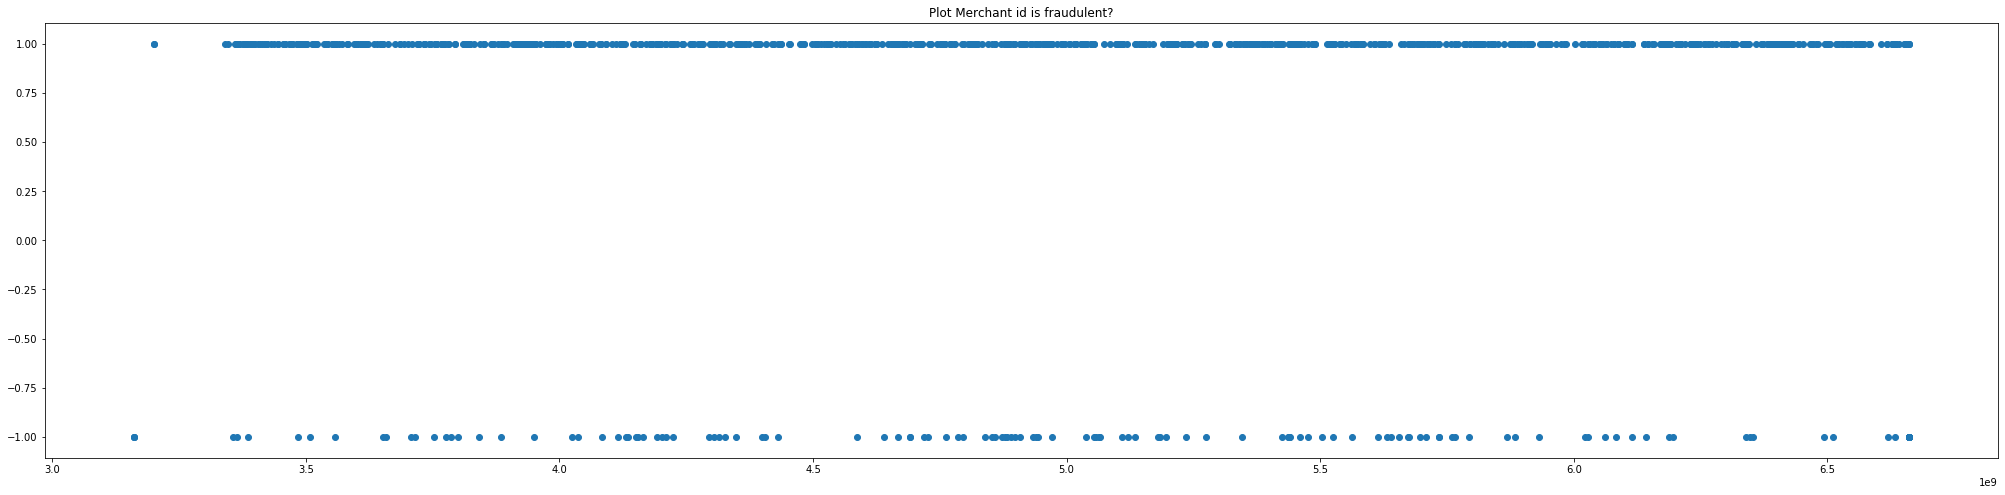

In [59]:
plt.scatter(X_test['Merchant_id'], y_test_IF['isFradulent'])
plt.title('Plot Merchant id is fraudulent? Real column')

Text(0.5, 1.0, 'Plot Merchant id is fraudulent? Predict Column')

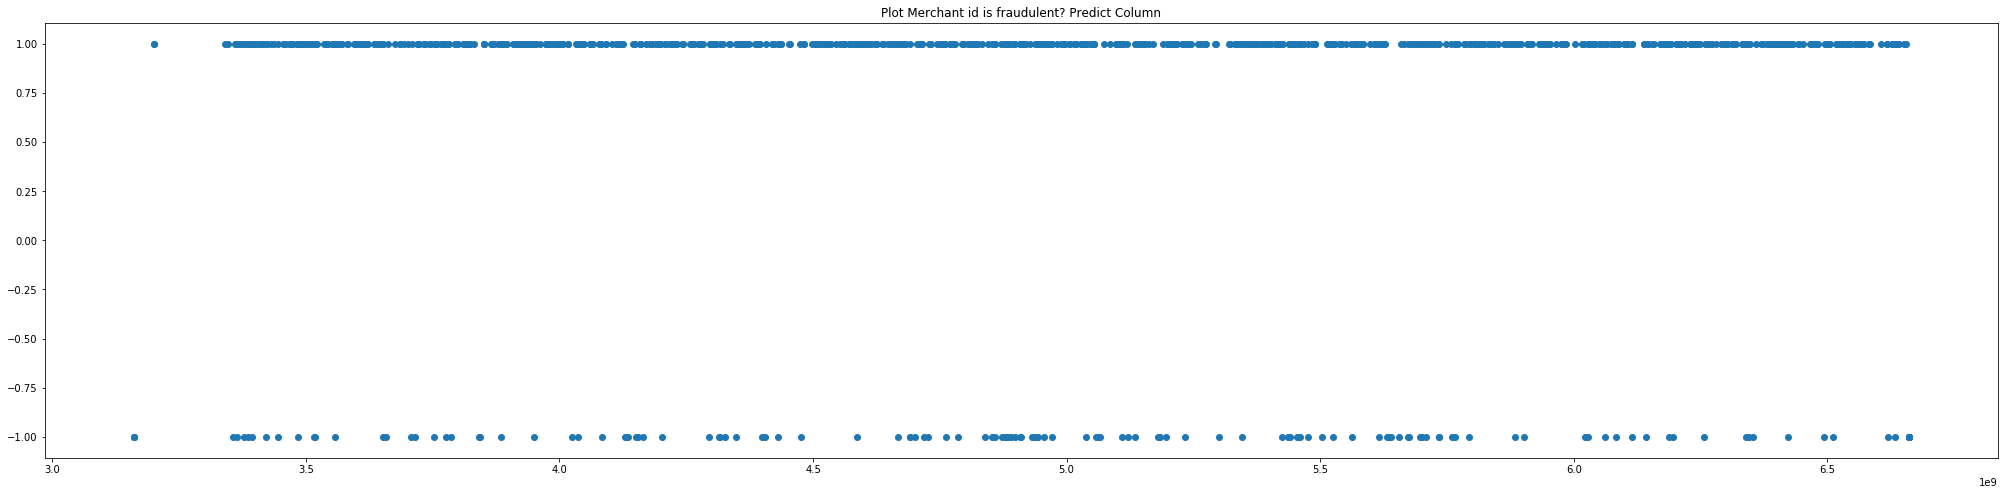

In [60]:
plt.scatter(X_test['Merchant_id'], pred_clf_IF_all)
plt.title('Plot Merchant id is fraudulent? Predict Column')

### Conclusiones

* De acuerdo al algoritmo de indentificación de columnas relevantes en el conjunto de datos, se concluye que la columna más importante es "IsHighRiskCountry".  
* Para el conjunto de datos manipulados en el ejercicio, el algoritmo Kmeans tiene una baja efectividad en la identificación de anomalías. El F1 score máximo arrojado fue de 0.69829.  
* Según el F1 score de 0.95399 para el conjunto de datos, el algoritmo "Isolation Forest"  entrenado con todas las columnas, el mejor modelo que puede aplicarse para la resolución del ejercicio. 

***Integrantes:***

**Erika Brand, Diana Rodríguez, Edwar Nieves, William Arevalo, Ronald Cuello**

**TABLA DE VALORACION INDIVIDUAL:**

		

|                                                            | Sí | No | Aveces | 
|:----------------------------------------------------------  |----|----|--------|
| Todos los miembros se han integrado al trabajo del grupo   |  X  |    |        | 
| Todos los miembros participan activamente                  |  X  |    |        | 
| Todos los miembros respetan otras ideas aportadas          |  X  |    |        |
| Todos los miembros participan en la elaboración del informe|  X  |    |        | 
| Me he preocupado por realizar un trabajo cooperativo con mis compañeros| X   |   |        | 
| Señala si consideras que algún aspecto del trabajo en grupo no ha sido adecuado|    |  X  |        |


___END___